---
# **RentWise - US Rental House Price Prediction using Machine Learning**
---

#### **Author:** Kartik

#### **Contact:** kkakar664@gmail.com

#### **Date:** Nov 05, 2023

## Table of Contents          

1. [Introduction](#intro)
2. [Feature Overview](#featureoverview)
3. [Loading and Setup](#loading)
4. [Assessment](#assessment)
5. [Preprocessing](#preprocessing)
> - [Feature Engineering](#engineering)
> - [Splitting the Dataset](#splitting)
6. [Baseline Modelling](#baseline)
> - [Linear Regression](#linear)
> - [Ridge Regression](#ridge)
> - [Lasso Regression](#lasso)
> - [Decision Tree Regressor](#decision)
> - [Random Forest Regressor](#random)
> - [Neural Network Regressor](#neural)
7. [Comparison and Conclusion](#comparison)

---
## Introduction <a class="anchor" id="intro"></a>
---

"RentWise - US Rental House Price Prediction using Machine Learning" is a project aimed at developing a predictive model for rental house prices in the United States. After thorough data cleaning and exploratory data analysis (EDA), the next phase involves Feature Engineering, where we extract and create relevant features to enhance the model's predictive power. The project will also establish baseline machine learning models, serving as a foundation for more advanced algorithms. By leveraging the power of data science and machine learning, RentWise seeks to provide valuable insights and accurate predictions for individuals and businesses involved in the real estate rental market, aiding in informed decision-making and efficient property valuation.

---

## Feature Overview <a class="anchor" id="featureoverview"></a>
---

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Columns</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>region</td>
      <td>Craigslist region</td>
    </tr>
    <tr>
      <th>2</th>
      <td>price</td>
      <td>Rent per month (Target Column)</td>
    </tr>
    <tr>
      <th>3</th>
      <td>type</td>
      <td>Housing type</td>
    </tr>
    <tr>
      <th>4</th>
      <td>sqfeet</td>
      <td>Total square footage</td>
    </tr>
    <tr>
      <th>5</th>
      <td>beds</td>
      <td>Number of Beds</td>
    </tr>
    <tr>
      <th>6</th>
      <td>baths</td>
      <td>Number of Bathrooms</td>
    </tr>
    <tr>
      <th>7</th>
      <td>cats_allowed</td>
      <td>Cats allowed boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>8</th>
      <td>dogs_allowed</td>
      <td>Dogs allowed boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>9</th>
      <td>smoking_allowed</td>
      <td>Smoking allowed boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>10</th>
      <td>wheelchair_access</td>
      <td>Has wheelchair access boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>11</th>
      <td>electric_vehicle_charge</td>
      <td>Has electric vehicle charger boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>12</th>
      <td>comes_furnished</td>
      <td>Comes with furniture boolean (1 = yes, 0 = no)</td>
    </tr>
    <tr>
      <th>13</th>
      <td>laundry_options</td>
      <td>Laundry options available</td>
    </tr>
    <tr>
      <th>14</th>
      <td>parking_options</td>
      <td>Parking options available</td>
    </tr>
    <tr>
      <th>15</th>
      <td>state</td>
      <td>State of listing</td>
    </tr>
    <tr>
      <th>16</th>
      <td>state_full</td>
      <td>State name in upper case</td>
    </tr>
  </tbody>
</table>


These are the names and descriptions of columns which we have to perform feature engineering on and get the dataset ready for modelling.

---

## Loading and Setup <a class="anchor" id="loading"></a>
---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Filter warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load our cleaned dataset called "cleaned_dataset"
df = pd.read_csv('cleaned_dataset_after_EDA.csv')

---
## Assessment <a class="anchor" id="assessment"></a>
---

In [3]:
# Set display options to show all columns.
pd.set_option('display.max_columns', None)

In [4]:
# Display the first 5 rows.
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,state_full
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,ca,CA
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,ca,CA
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,ca,CA
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,ca,CA
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,ca,CA


In [5]:
# Display the last 5 rows of the dataframe (df) to get an overview of the provided data. 
df.tail()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state,state_full
380148,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,CA
380149,reno / tahoe,1549,apartment,1034,2,2.0,1,1,0,0,0,0,w/d in unit,off-street parking,ca,CA
380150,reno / tahoe,1249,apartment,840,2,1.0,1,1,1,0,0,0,laundry on site,off-street parking,ca,CA
380151,reno / tahoe,1429,apartment,976,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,CA
380152,reno / tahoe,1295,apartment,957,2,2.0,1,1,1,0,0,0,w/d in unit,carport,ca,CA


In [6]:
# Get the shape of our dataset.
df.shape

(380153, 16)

Our dataset has **380,153 rows** and **16 columns**. 

In [7]:
# Display all the column names as a list.
df.columns

Index(['region', 'price', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'state', 'state_full'],
      dtype='object')

In [8]:
# Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380153 entries, 0 to 380152
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   380153 non-null  object 
 1   price                    380153 non-null  int64  
 2   type                     380153 non-null  object 
 3   sqfeet                   380153 non-null  int64  
 4   beds                     380153 non-null  int64  
 5   baths                    380153 non-null  float64
 6   cats_allowed             380153 non-null  int64  
 7   dogs_allowed             380153 non-null  int64  
 8   smoking_allowed          380153 non-null  int64  
 9   wheelchair_access        380153 non-null  int64  
 10  electric_vehicle_charge  380153 non-null  int64  
 11  comes_furnished          380153 non-null  int64  
 12  laundry_options          380153 non-null  object 
 13  parking_options          380153 non-null  object 
 14  stat

In [9]:
# Get a statistical summary of the dataset
df.describe()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000,380153.000000
mean,1177.464132,989.757264,1.888006,1.528369,0.729030,0.709720,0.732589,0.081972,0.012816,0.046847
std,546.848114,365.509826,0.869570,0.630225,0.444461,0.453892,0.442609,0.274323,0.112480,0.211311
min,106.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,812.000000,750.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1040.000000,949.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1395.000000,1147.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,5000.000000,4000.000000,8.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Interpretation**

1. **Shape of the Dataset:**
   - The dataset consists of 380,153 entries and 16 columns.

2. **Column Information:**
   - The dataset contains a mix of data types, including 9 integers (`int64`), 1 float (`float64`), and 6 objects (`object`).
   - There are no missing values.
   - The statistical summary of our numerical columns looks good and ready to be used for the modelling

3. **Categorical Features:**
   - Categorical features include `region`, `type`, `laundry_options`, `parking_options`, `state`, and `state_full`. We have to do some pre-processing on these columns.

4. **Memory Usage:**
   - The dataset consumes approximately 46.4 MB of memory, which is relatively reasonable for a dataset of this size.

After looking at our dataset, we can now move onto the Pre-processing phase where we will do some Feature engineering.

---

## Pre-processing <a class="anchor" id="preprocessing"></a>
---

### Feature Engineering <a class="anchor" id="engineering"></a>

Feature engineering is crucial in machine learning and data analysis because it directly impacts the model's performance and predictive power. It involves creating, transforming, or selecting relevant features from raw data to improve a model's ability to capture underlying patterns. Effective feature engineering can enhance model accuracy, reduce overfitting, and speed up training. It also enables the model to extract valuable insights and relationships from the data, making it a fundamental step in building robust and effective machine learning solutions.

We will be starting with the column called **'state'**.

#### **1. 'state' column**
Firstly, we will be **dropping** the ***'state'*** column because it contains redundant information in the form of abbreviated US state names, which is already present in the ***'state_full'*** column. This action will eliminate redundancy and colinearity, optimize the dataset and enhance data clarity for analysis and modeling purposes.

In [10]:
# Dropping the 'state' column
df.drop(columns=['state'], inplace=True)

In [11]:
# Sanity check
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state_full
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,CA
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,CA
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,CA
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,CA
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,CA


Now, we have successfully dropped the extra 'state' column, we can move on the others.

#### **2. 'state_full' column**

In [12]:
# Rename the 'state_full' column
df.rename(columns={'state_full': 'state'}, inplace=True)

We renamed our **'state_full'** column as **'state'** for easier understanding.

In [107]:
# Another sanity check to ensure that the column name has changed successfully.
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,reno / tahoe,1148,apartment,1078,3,2.0,1,1,0,0,0,0,w/d in unit,carport,CA
1,reno / tahoe,1200,condo,1001,2,2.0,0,0,0,0,0,0,w/d hookups,carport,CA
2,reno / tahoe,1813,apartment,1683,2,2.0,1,1,1,0,0,0,w/d in unit,attached garage,CA
3,reno / tahoe,1095,apartment,708,1,1.0,1,1,1,0,0,0,w/d in unit,carport,CA
4,reno / tahoe,289,apartment,250,0,1.0,1,1,1,1,0,1,laundry on site,off-street parking,CA


#### **3. 'region' column**
Now, let's look at the 'region' column. We will find the counts of the unique values in this columnn.

In [109]:
# Get value counts
df['region'].value_counts()

region
jacksonville      4213
columbus          3666
jackson           3654
rochester         3650
fayetteville      3646
                  ... 
southwest MS        12
st louis             9
southwest TX         7
fort smith, AR       5
kansas city          3
Name: count, Length: 404, dtype: int64

**Findings**

The ***"region"*** column in the dataset exhibits significant variability with **404 unique values**. The top regions include **'jacksonville', 'columbus', 'jackson', 'rochester'** and **'fayetteville'** among others. However, many regions have a low occurrence, with some appearing only a few times.


**Analysis**

The decision of keeping or removing of this feature can have a significant impact on the performance of our machine learning models:

- The ***"region"*** column could be pivotal for our models, offering **vital insights into geographical or regional patterns that are indispensable for accurate predictions**.

- It provides added **granularity**, empowering our models to capture **intricate variations and patterns** in the data.

- By incorporating the ***"region"*** column, our models gain the capacity to **discern and leverage regional nuances, contributing significantly to their overall accuracy**.

---

#### Converting Categorical columns into Numerical columns

Changing categorical columns into numerical ones is essential for machine learning models because these models primarily operate on mathematical equations. Categorical data, such as labels or text, cannot be directly processed by algorithms. Converting them to numerical representations allows models to understand and interpret these features, enabling the algorithms to learn relationships, make predictions, and generalize patterns effectively. This transformation facilitates the integration of categorical information into the mathematical frameworks of machine learning algorithms, enhancing their ability to derive meaningful insights from diverse types of data.

To do this, we will be using the technique of One-Hot encoding.

#### One-Hot Encoding

It is a technique used to convert categorical data, such as string-based labels, into numerical format. In this process, each unique category in a categorical column is transformed into a binary column (0 or 1), indicating the presence or absence of that category for each data point. One-hot encoding is chosen for these specific columns ('region', type', 'laundry_options', 'parking_options', and 'state') for the following reasons:

**1. Categorical Nature:** These columns contain categorical information that does not have a natural numerical order. For instance, ***'region'*** represents different areas where the rentals properties are, ***'type'*** represents different housing types, ***'laundry_options'*** describes laundry facilities, ***'parking_options'*** specifies parking arrangements, and ***'state'*** represents geographical locations. One-hot encoding is well-suited for such non-ordinal categories.

**2. Machine Learning Models:** Many machine learning algorithms, such as **linear regression or decision trees** (which we will be using late on), require numerical input features. By one-hot encoding these categorical columns, we enable the model to understand and utilize the categorical information effectively in the prediction process.

**3. Eliminating Ordinal Relationships:** One-hot encoding ensures that there are no unintended ordinal relationships between categories. For example, without one-hot encoding, a model might erroneously interpret a numerical order between different housing types, which could lead to incorrect predictions.

**4. Multicollinearity:** One-hot encoding reduces the risk of multicollinearity, a situation where independent variables in a model are highly correlated. By using binary columns for each category, we avoid creating linear dependencies between features, which can negatively impact model performance.

In [110]:
# One-Hot Encoding for each categorical column separately.

# One-hot encoding for 'type'
dummies1 = pd.get_dummies(df['type'], prefix='type', drop_first=True)

# One-hot encoding for 'region'
dummies2 = pd.get_dummies(df['region'], prefix='region', drop_first=True)

# One-hot encoding for 'laundry_options'
dummies3 = pd.get_dummies(df['laundry_options'], prefix='laundry', drop_first=True)

# One-hot encoding for 'parking_options'
dummies4 = pd.get_dummies(df['parking_options'], prefix='parking', drop_first=True)

# One-hot encoding for 'state'
dummies5 = pd.get_dummies(df['state'], prefix='state', drop_first=True)

In [111]:
# Convert boolean values to 0s and 1s
dummies1 = dummies1.astype(int)
dummies2 = dummies2.astype(int)
dummies3 = dummies3.astype(int)
dummies4 = dummies4.astype(int)
dummies5 = dummies5.astype(int)

In [112]:
# Concatenate the dummy variables with the original DataFrame
df_encoded = pd.concat([df, dummies1, dummies2, dummies3, dummies4, dummies5], axis=1)

In [113]:
# Drop the original categorical columns to avoid the dummy variable trap
df_encoded.drop(['region', 'type', 'laundry_options', 'parking_options', 'state'], axis=1, inplace=True)

In [114]:
# Sanity check
df_encoded.head()

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_assisted living,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,region_billings,region_binghamton,region_birmingham,region_bismarck,region_bloomington,region_bloomington-normal,region_boise,region_boone,region_boston,region_boulder,region_bowling green,region_bozeman,region_brainerd,region_brownsville,region_brunswick,region_buffalo,region_butte,region_cape cod / islands,region_catskills,region_cedar rapids,region_central NJ,region_central louisiana,region_central michigan,region_champaign urbana,region_charleston,region_charlotte,region_charlottesville,region_chattanooga,region_chautauqua,region_chicago,region_chico,region_chillicothe,region_cincinnati,region_clarksville,region_cleveland,region_clovis / portales,region_college station,region_colorado springs,region_columbia,region_columbia / jeff city,region_columbus,region_cookeville,region_corpus christi,region_corvallis/albany,region_cumberland valley,region_dallas / fort worth,region_danville,region_dayton / springfield,region_daytona beach,region_decatur,region_deep east texas,region_del rio / eagle pass,region_delaware,region_denver,region_des moines,region_detroit metro,region_dothan,region_dubuque,region_duluth / superior,region_east idaho,region_east oregon,region_eastern CO,region_eastern CT,region_eastern NC,region_eastern kentucky,region_eastern montana,region_eastern panhandle,region_eastern shore,region_eau claire,region_el paso,region_elko,region_elmira-corning,region_erie,region_eugene,region_evansville,region_fairbanks,region_fargo / moorhead,region_farmington,region_fayetteville,region_finger lakes,region_flagstaff / sedona,region_flint,region_florence,region_florence / muscle shoals,region_florida keys,region_fort collins / north CO,region_fort dodge,region_fort smith,"region_fort smith, AR",region_fort wayne,region_frederick,region_fredericksburg,region_fresno / madera,region_ft myers / SW florida,region_gadsden-anniston,region_gainesville,region_galveston,region_glens falls,region_gold country,region_grand forks,region_grand island,region_grand rapids,region_great falls,region_green bay,region_greensboro,region_greenville / upstate,region_gulfport / biloxi,region_hanford-corcoran,region_harrisburg,region_harrisonburg,region_hartford,region_hattiesburg,region_hawaii,region_heartland florida,region_helena,region_hickory / lenoir,region_high rockies,region_hilton head,region_holland,region_houma,region_houston,region_hudson valley,region_humboldt county,region_huntington-ashland,region_huntsville / decatur,region_imperial county,region_indianapolis,region_inland empire,region_iowa city,region_ithaca,region_jackson,region_jacksonville,region_janesville,region_jersey shore,region_jonesboro,region_joplin,region_kalamazoo,region_kalispell,region_kansas city,"region_kansas city, MO",region_kenai peninsula,region_kennewick-pasco-richland,region_kenosha-racine,region_killeen / temple / ft hood,region_kirksville,region_klamath falls,region_knoxville,region_kokomo,region_la crosse,region_la salle co,region_lafayette,region_lafayette / west lafayette,region_lake charles,region_lake of the ozarks,region_lakeland,region_lancaster,region_lansing,region_laredo,region_las cruces,region_las vegas,region_lawrence,region_lawton,region_lehigh valley,region_lewiston / clarkston,region_lexington,region_lima / findl

#### Feature Engineering Methodology

**1. Dropping 'state' Column:** The initial step involves removing the 'state'  column from the DataFrame using the 'drop' method. This action is taken to remove the repetition of information. 

**2. Renaming 'state_full' Column:** The 'state_full' column is renamed to 'state' using the rename method. This ensures consistency in column names and simplifies future reference to the state information.

**3. One-Hot Encoding for Categorical Columns:** One-hot encoding is employed individually for each relevant categorical column using the get_dummies function from Pandas. This process transforms categorical variables into binary representations, creating new columns for each category.

**4. Handling Boolean Values:** Since boolean values are present in the encoded columns, they are converted to numeric format (0s and 1s) using the astype method to ensure uniformity in the dataset.

**5. Concatenation of Dummy Variables:** The newly created dummy variables are concatenated with the original DataFrame along the horizontal axis using the concat function. This results in an expanded DataFrame with the additional binary columns.

**6. Dropping Original Categorical Columns:** To avoid the dummy variable trap (multicollinearity), the original categorical columns ('region', 'type', 'laundry_options', 'parking_options', 'state') are dropped from the DataFrame. This step helps enhance the efficiency and interpretability of machine learning models.

**7. Final DataFrame:** The resulting DataFrame, named "df_encoded", is now ready for further analysis and machine learning modeling. It incorporates the one-hot encoded categorical variables, making the data suitable for algorithms that require numerical input features.

**8. Sanity Check:** A brief examination of the first few rows of the encoded DataFrame is conducted to verify that the changes have been successfully implemented.

<br>
By following these steps, the categorical variables in the original DataFrame are appropriately encoded, providing a structured and numeric representation that can be effectively utilized in machine learning models.

In [115]:
# Shape of our dataframe
df_encoded.shape

(380153, 484)

**`Findings:`** After performing the One-Hot encoding on our categorical columns, we now have **380,153 rows** and **484 columns**.

In [116]:
# To find datatypes of the columns in our dataframe
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380153 entries, 0 to 380152
Columns: 484 entries, price to state_WY
dtypes: float64(1), int32(474), int64(9)
memory usage: 716.4 MB


**Interpretation**

The **"df_encoded"** DataFrame consists of **1 - float64, 9 - int64**, and **474 - int32** data type columns, collectively utilizing **716.4 MB** of memory. The extensive use of integer data types suggests an efficient encoding of categorical variables, optimizing memory utilization for subsequent machine learning analyses.

Now, we are ready to split our dataset into Train and Test set for using them in modeling.

---
### Splitting the dataset <a class="anchor" id="splitting">
---

In [52]:
# Defining our variables 

# Independent variable
X = df_encoded.drop(columns="price")  

# Target Variable (dependent)
y = df_encoded["price"]

In [53]:
# Check our independent variables
X

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,type_assisted living,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,region_annapolis,region_appleton-oshkosh-FDL,region_asheville,region_ashtabula,region_athens,region_atlanta,region_auburn,region_augusta,region_austin,region_bakersfield,region_baltimore,region_baton rouge,region_battle creek,region_beaumont / port arthur,region_bellingham,region_bemidji,region_bend,region_billings,region_binghamton,region_birmingham,region_bismarck,region_bloomington,region_bloomington-normal,region_boise,region_boone,region_boston,region_boulder,region_bowling green,region_bozeman,region_brainerd,region_brownsville,region_brunswick,region_buffalo,region_butte,region_cape cod / islands,region_catskills,region_cedar rapids,region_central NJ,region_central louisiana,region_central michigan,region_champaign urbana,region_charleston,region_charlotte,region_charlottesville,region_chattanooga,region_chautauqua,region_chicago,region_chico,region_chillicothe,region_cincinnati,region_clarksville,region_cleveland,region_clovis / portales,region_college station,region_colorado springs,region_columbia,region_columbia / jeff city,region_columbus,region_cookeville,region_corpus christi,region_corvallis/albany,region_cumberland valley,region_dallas / fort worth,region_danville,region_dayton / springfield,region_daytona beach,region_decatur,region_deep east texas,region_del rio / eagle pass,region_delaware,region_denver,region_des moines,region_detroit metro,region_dothan,region_dubuque,region_duluth / superior,region_east idaho,region_east oregon,region_eastern CO,region_eastern CT,region_eastern NC,region_eastern kentucky,region_eastern montana,region_eastern panhandle,region_eastern shore,region_eau claire,region_el paso,region_elko,region_elmira-corning,region_erie,region_eugene,region_evansville,region_fairbanks,region_fargo / moorhead,region_farmington,region_fayetteville,region_finger lakes,region_flagstaff / sedona,region_flint,region_florence,region_florence / muscle shoals,region_florida keys,region_fort collins / north CO,region_fort dodge,region_fort smith,"region_fort smith, AR",region_fort wayne,region_frederick,region_fredericksburg,region_fresno / madera,region_ft myers / SW florida,region_gadsden-anniston,region_gainesville,region_galveston,region_glens falls,region_gold country,region_grand forks,region_grand island,region_grand rapids,region_great falls,region_green bay,region_greensboro,region_greenville / upstate,region_gulfport / biloxi,region_hanford-corcoran,region_harrisburg,region_harrisonburg,region_hartford,region_hattiesburg,region_hawaii,region_heartland florida,region_helena,region_hickory / lenoir,region_high rockies,region_hilton head,region_holland,region_houma,region_houston,region_hudson valley,region_humboldt county,region_huntington-ashland,region_huntsville / decatur,region_imperial county,region_indianapolis,region_inland empire,region_iowa city,region_ithaca,region_jackson,region_jacksonville,region_janesville,region_jersey shore,region_jonesboro,region_joplin,region_kalamazoo,region_kalispell,region_kansas city,"region_kansas city, MO",region_kenai peninsula,region_kennewick-pasco-richland,region_kenosha-racine,region_killeen / temple / ft hood,region_kirksville,region_klamath falls,region_knoxville,region_kokomo,region_la crosse,region_la salle co,region_lafayette,region_lafayette / west lafayette,region_lake charles,region_lake of the ozarks,region_lakeland,region_lancaster,region_lansing,region_laredo,region_las cruces,region_las vegas,region_lawrence,region_lawton,region_lehigh valley,region_lewiston / clarkston,region_lexington,region_lima / findlay,reg

In [66]:
# Checking the shape of X and y variables

print(f'Original data set had {df_encoded.shape[0]} rows and {df_encoded.shape[1]} columns.')
print(f'X has {X.shape[0]} rows and {X.shape[1]} columns.')
print(f'y has {y.shape[0]} rows and 1 column.')

Original data set had 380153 rows and 484 columns.
X has 380153 rows and 483 columns.
y has 380153 rows and 1 column.


In [55]:
# Split the data into train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Print out the rows and columns.
print(f'X_train shape: {X_train.shape}')
print(f'X_test: {X_test.shape}')

print('------------------------------------')

print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (304122, 483)
X_test: (76031, 483)
------------------------------------
y_train shape: (304122,)
y_test shape: (76031,)


#### Methodology

**1. Data Definition:** The dataset **"df_encoded"** is initially loaded with **380,153 rows** and **484 columns**, where:
> - **'price'** is the target variable
> - **'X'** consists of **483 independent variables**.

**2. Data Splitting:** The dataset is split into training and testing sets using the train_test_split function. The split is **80% for training** (X_train, y_train) and **20% for testing** (X_test, y_test). A random state of **42** is set for reproducibility.

**3. Data Shape Check:** Print statements are used to check the shapes of the original dataset, independent variables (X), and target variable (y). This ensures a clear understanding of the dimensions before and after splitting.

**4. Results Printing:** The shapes of the training and testing sets **(X_train, X_test, y_train, y_test)** are printed to confirm the successful split and provide insight into the size of the training and testing datasets.


#### Conclusion

The successful splitting and examination of dataset dimensions set the stage for training machine learning models. The larger training set allows models to learn patterns, while the testing set serves as an independent dataset for evaluating model performance.

---
## Baseline Modelling <a class="anchor" id="modelling"></a>
---

Baseline modeling is the initial step in the development of machine learning models, involving the creation and evaluation of simple and rudimentary models. These basic models serve as benchmarks, providing a reference point for assessing the performance of more sophisticated algorithms.

**Advantages:**

**1. Performance Benchmark:**

> - **Purpose:** Establishing baseline models sets a standard against which the performance of more complex models can be compared.
> - **Advantage:** It helps evaluate the effectiveness of advanced models by providing a baseline metric for comparison.

**2. Simplicity and Transparency:**
> - **Purpose:** Baseline models are intentionally kept simple, aiding in transparency and ease of interpretation.
> - **Advantage:** The simplicity allows for a clear understanding of how the model behaves, making it easier to identify and address potential issues.

**3. Resource Efficiency:**
> - **Purpose:** Baseline models are computationally less demanding compared to complex models.
> - **Advantage:** They serve as a quick and resource-efficient way to assess the feasibility of modeling the given data, especially in the early stages of a project.

**4. Identifying Data Patterns:**
> - **Purpose:** Baseline models capture basic patterns inherent in the data without overfitting.
> - **Advantage:** By understanding how well a simple model performs, one gains insights into the data's inherent characteristics and potential challenges.

**5. Model Complexity Guidance:**

> - **Purpose:** Baseline models help in determining the level of model complexity required to adequately represent the data.
> - **Advantage:** If a more complex model does not significantly outperform the baseline, it may indicate that additional model complexity might not be justified for the given task.

**6. Incremental Improvement:**

> - **Purpose:** Baseline models set the stage for iterative model improvement.
> - **Advantage:** As more advanced models are introduced and refined, the baseline provides a reference point for evaluating the incremental gain in predictive performance.

For this project, we will be looking at and comparing 6 different models: 
- Linear Regression
- Ridge Regression
- Lasso Regression
- Decision Tree
- Random Forest
- Neural Network Regressor


For all the upcoming models, we will be performing the following steps:

**1. Model Initialization:** We will begin by Instantiating our models, for example 'LinearRegression' class will be used from the scikit-learn library for the Linear Regression Model.

**2. Model Training:** Regression models will be trained using the training set (X_train and y_train) by fitting them to the input features and target variable, allowing it to learn the underlying patterns and relationships in the data.

**3. Prediction on Test Set:** Then, we will utilize the trained model to make predictions on the test set, evaluating the model's ability to generalize to unseen data.

**4. Performance Evaluation:** Model's performance will be evaluated using relevant metrics such as Mean Squared Error (MSE), R2 Score.

**5. Printing the result:** The metrics will be printed out for comparison.

#### Metrics


**1. R-squared (R^2):** R^2 is a statistical measure representing the proportion of variance in the dependent variable explained by the independent variables. It ranges from 0 to 1, with 0 indicating poor fit and 1 indicating a perfect fit. Higher \(R^2\) values suggest a better-fitting model, but it should be used alongside other metrics for a comprehensive evaluation.

**2. Mean Squared Error (MSE):** MSE calculates the average squared difference between predicted and actual values in a regression model. It provides a measure of the model's precision, with lower MSE values indicating better accuracy. MSE is sensitive to outliers and is commonly used alongside \(R^2\) to assess a model's overall performance.

After defining the steps to be taken and our metrics, we can start making our models.

### 1. Linear Regression

In [57]:
# Create a Linear Regression model                            
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Predict on the test data
y_pred_linear = linear_model.predict(X_test)

# Calculate MSE and R2 scores for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)


# Print metrics
print("Linear Regression Metrics:")
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2 Score: {r2_linear}") 

Linear Regression Metrics:
Linear Regression MSE: 92791.80637125189
Linear Regression R2 Score: 0.6859667330118215


| # | Model                 | MSE Score | R2 Score |
|---|-----------------------|-----------|----------|
| 1 | Linear Regression     | 92791.81  | 0.68597  |

### 2. Ridge Regression 

In [58]:
# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Calculate MSE and R2 scores for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print metrics
print("Ridge Regression Metrics:")
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2 Score: {r2_ridge}")

Ridge Regression Metrics:
Ridge Regression MSE: 92753.0658764225
Ridge Regression R2 Score: 0.686097841615391


| # | Model                 | MSE Score | R2 Score |
|---|-----------------------|-----------|----------|
| 1 | Linear Regression     | 92791.81  | 0.68597  |
| 2 | Ridge Regression      | 92753.07  | 0.68610  |

### 3. Lasso Regression

In [59]:
# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lasso = lasso_model.predict(X_test)

# Calculate MSE and R2 scores for Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print metrics
print("Lasso Regression Metrics:")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2 Score: {r2_lasso}")

Lasso Regression Metrics:
Lasso Regression MSE: 122860.25970570504
Lasso Regression R2 Score: 0.5842067285118412


| # | Model                 | MSE Score | R2 Score |
|---|-----------------------|-----------|----------|
| 1 | Linear Regression     | 92791.81  | 0.68597  |
| 2 | Ridge Regression      | 92753.07  | 0.68610  |
| 3 | Lasso Regression      | 122860.26 | 0.58421  |

### 4. Decision Tree

In [60]:
# Create a Decision Tree model
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate MSE and R2 scores for Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


# Print metrics
print("Decision Tree Metrics:")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R2 Score: {r2_tree}")

Decision Tree Metrics:
Decision Tree MSE: 72476.77053797891
Decision Tree R2 Score: 0.7547184614368554


| # | Model                 | MSE Score | R2 Score |
|---|-----------------------|-----------|----------|
| 1 | Linear Regression     | 92791.81  | 0.68597  |
| 2 | Ridge Regression      | 92753.07  | 0.68610  |
| 3 | Lasso Regression      | 122860.26 | 0.58421  |
| 4 | Decision Tree         | 72476.77  | 0.75472  |

### 5. Random Forest

In [61]:
# Create a Random Forest model
forest_model = RandomForestRegressor()

# Fit the model to the training data
forest_model.fit(X_train, y_train)

# Predict on the test data
y_pred_forest = forest_model.predict(X_test)

# Calculate MSE and R2 scores for Random Forest
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)


# Print metrics
print("Random Forest Metrics:")
print(f"Random Forest MSE: {mse_forest}")
print(f"Random Forest R2 Score: {r2_forest}")

Random Forest Metrics:
Random Forest MSE: 46174.067574024266
Random Forest R2 Score: 0.8437341198813423


| # | Model                 | MSE Score | R2 Score |
|---|-----------------------|-----------|----------|
| 1 | Linear Regression     | 92791.81  | 0.68597  |
| 2 | Ridge Regression      | 92753.07  | 0.68610  |
| 3 | Lasso Regression      | 122860.26 | 0.58421  |
| 4 | Decision Tree         | 72476.77  | 0.75472  |
| 5 | Random Forest         | 46174.07  | 0.84373  |

### 6. Neural Network Regressor

In [62]:
# Create a Neural Network Regressor model
nn_model = MLPRegressor(hidden_layer_sizes=(100), max_iter=1000, random_state=1)

# Fit the model to the training data
nn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nn = nn_model.predict(X_test)

# Calculate MSE and R2 scores for Neural Network Regressor
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Print metrics
print("Neural Network Regressor Metrics:")
print(f"Neural Network Regressor MSE: {mse_nn}")
print(f"Neural Network Regressor R2 Score: {r2_nn}")

Neural Network Regressor Metrics:
Neural Network Regressor MSE: 73906.9649448008
Neural Network Regressor R2 Score: 0.7498782859993218


| # | Model                         | MSE Score | R2 Score |
|---|-------------------------------|-----------|----------|
| 1 | Linear Regression             | 92791.81  | 0.68597  |
| 2 | Ridge Regression              | 92753.07  | 0.68610  |
| 3 | Lasso Regression              | 122860.26 | 0.58421  |
| 4 | Decision Tree                 | 72476.77  | 0.75472  |
| 5 | Random Forest                 | 46174.07  | 0.84373  |
| 6 | Neural Network Regressor      | 73906.96  | 0.74988  |

#### Model Comparison before Scaling

Let's visualize the comparison between our models using the R^2 metric.  

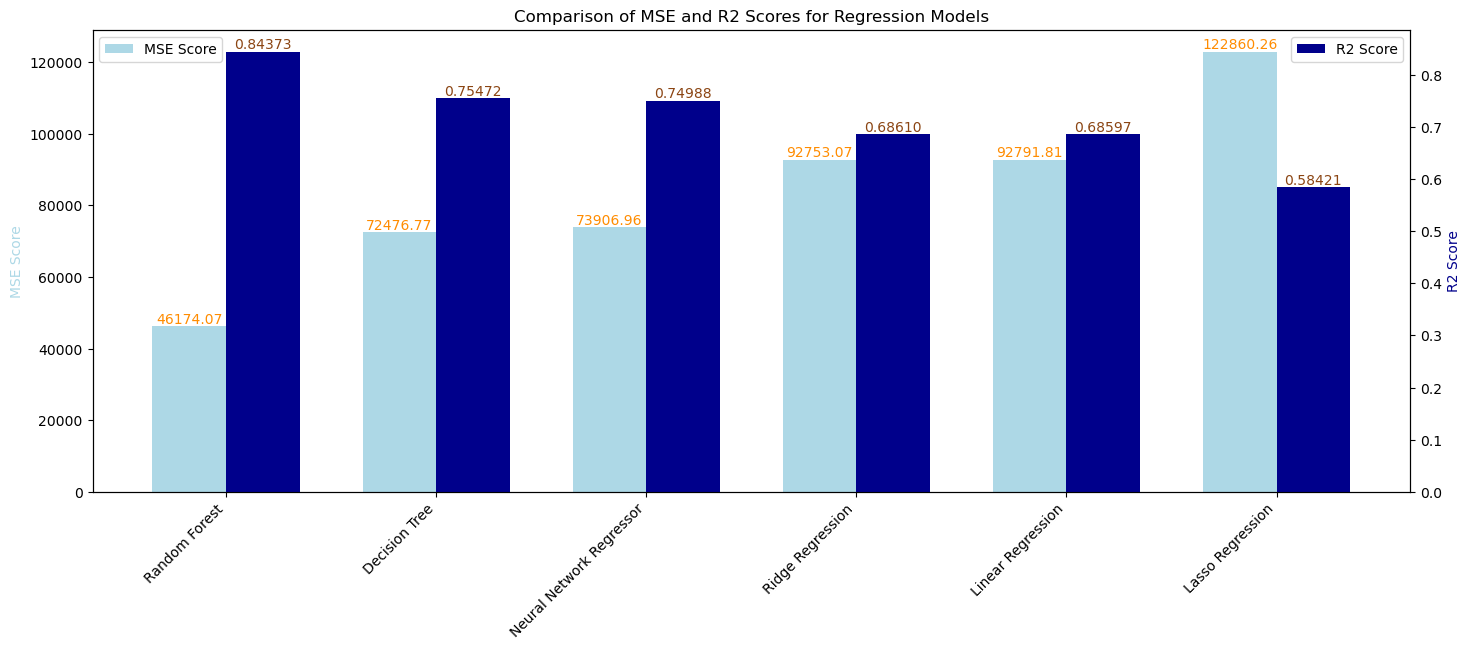

In [167]:
# Names of my models
model_names = ["Linear Regression", "Ridge Regression", "Lasso Regression", 
               "Decision Tree", "Random Forest", "Neural Network Regressor"]

# List of mse scores
mse_scores = [92791.81, 92753.07, 122860.26, 72476.77, 46174.07, 73906.96]

# List of R2 scores
r2_scores = [0.68597, 0.68610, 0.58421, 0.75472, 0.84373, 0.74988]

# Sort model names and scores based on R2 values in descending order
sorted_indices = np.argsort(r2_scores)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_mse_scores = [mse_scores[i] for i in sorted_indices]
sorted_r2_scores = [r2_scores[i] for i in sorted_indices]

# Create a bar plot with sorted values and the "darkorange" and "saddlebrown" color palettes
fig, ax1 = plt.subplots(figsize=(17, 6))

# Bar width
bar_width = 0.35

# Bar plot for MSE scores
bar1 = ax1.bar(np.arange(len(sorted_model_names)), sorted_mse_scores, bar_width, label='MSE Score', color='lightblue')

# Create a second y-axis for R2 scores
ax2 = ax1.twinx()
bar2 = ax2.bar(np.arange(len(sorted_model_names)) + bar_width, sorted_r2_scores, bar_width, label='R2 Score', color='darkblue')

# Set x-axis ticks and labels
ax1.set_xticks(np.arange(len(sorted_model_names)) + bar_width / 2)
ax1.set_xticklabels(sorted_model_names, rotation=45, ha='right')

# Set y-axis labels
ax1.set_ylabel('MSE Score', color='lightblue')
ax2.set_ylabel('R2 Score', color='darkblue')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add values on top of the bars
for i, (mse, r2) in enumerate(zip(sorted_mse_scores, sorted_r2_scores)):
    ax1.text(i, mse, f'{mse:.2f}', ha='center', va='bottom', color='darkorange')
    ax2.text(i + bar_width, r2, f'{r2:.5f}', ha='center', va='bottom', color='saddlebrown')

plt.title("Comparison of MSE and R2 Scores for Regression Models")
plt.show()

**Findings**

1. The **Random Forest** model outperforms other models with the highest **R2 Score of 0.84373** and the lowest **MSE Score of 46174.07**. It demonstrates superior predictive accuracy and generalization.

2. The **Decision Tree** and **Neural Network Regressor** also show strong performance, with **R2 Scores of 0.75472** and **0.74988**, respectively. These models capture complex patterns in the data.

3. **Ridge Regression** performs reasonably well with an **R2 Score of 0.68610** and an **MSE Score of 92753.07**. It benefits from regularization, controlling overfitting.

4. **Linear Regression** and **Lasso Regression** exhibit similar **R2 Scores**, but **Linear Regression** has a slightly lower **MSE Score**. These models provide a baseline understanding of the data.

5. **Lasso Regression** model has the lowest **R2 Score** of **0.58421** showing that this is our weakest model.


---

The above modelling was performed on the entire dataset, i.e, unscaled data. The lack of scaling may impact the models' ability to effectively learn patterns and make accurate predictions. For example, in  our regression models, the coefficients may not accurately represent the variable importance if the features are on different scales. It also makes it computationally expensive to run. For instance, the Random Forest and Neural Network Regressor took more than 14 hours to run.

Therefore, we will be scaling our dataset using the Standard scaler. 

### Scaling the dataset

Scaling a dataset involves transforming the numerical features to a standard scale, typically between 0 and 1 or with a mean of 0 and a standard deviation of 1. This process ensures:

- **Improved Convergence:** Scaling facilitates faster convergence during optimization in regression models, especially for algorithms relying on gradient descent.

- **Prevents Dominance:** It prevents features with larger scales from dominating the learning process, ensuring each feature contributes equally.

- **Numerical Stability:** Scaling aids in preventing numerical instability, enhancing the stability of regression models.

- **Consistent Regularization:** Ensures regularization terms have consistent impact across features, contributing to more reliable model performance.

- **Enhanced Interpretability:** Scaling makes it easier to interpret coefficients, allowing for a clearer understanding of their relative importance.

- **Improved Runtime Efficiency:** Scaling reduces the runtime for regression models by facilitating faster convergence, making the optimization process more efficient and reducing computational time.

In [68]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit(X_train)

# Transform the test data using the scaler fitted on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# Getting the number of columns from our 'X_train_scaled'
X_train_scaled.shape[1]

483

**Methodology**

1. **Initialized Scaler:** An instance of the `StandardScaler` was created to scale the data.

2. **Fit on Training Data:** The scaler was fitted on the training data (`X_train`) to compute the mean and standard deviation necessary for scaling.

3. **Transformed Training Data:** The fitted scaler was used to transform the training data (`X_train`), scaling it based on the computed mean and standard deviation.

4. **Transformed Test Data:** The test data (`X_test`) was transformed using the same scaler fitted on the training data. This ensured consistency in scaling between the training and test sets.

5. **Got Scaled Feature Count:** The number of features after scaling was retrieved and printed, obtained from the shape of the scaled training data (`X_train_scaled`).

This process standardized the features, making them comparable and suitable for machine learning models that are sensitive to the scale of input variables.


---

### Comparing the models again on the Scaled data

After successfully scaling our dataset, we will follow the same steps as above to build our models, but this time we will use the scaled dataset and compare them using our metrics. 

### 1. Linear Regression <a class="anchor" id="linear"></a>

In [88]:
# Create a Linear Regression model on scaled data
linear_model_scaled = LinearRegression()

linear_model_scaled.fit(X_train_scaled, y_train)

y_pred_linear_scaled = linear_model_scaled.predict(X_test_scaled)

mse_linear_scaled = mean_squared_error(y_test, y_pred_linear_scaled)
r2_linear_scaled = r2_score(y_test, y_pred_linear_scaled)

print("Linear Regression Metrics on Scaled Data:")
print(f"Linear Regression MSE: {mse_linear_scaled}")
print(f"Linear Regression R2 Score: {r2_linear_scaled}")

Linear Regression Metrics on Scaled Data:
Linear Regression MSE: 1.3829799815103887e+27
Linear Regression R2 Score: -4.680388697633008e+21


| # | Model                 | MSE Score                   | R2 Score                   |
|---|-----------------------|-----------------------------|----------------------------|
| 1 | Linear Regression     | 1.3829799815103887e+27      | -4.680388697633008e+21    |

### 2. Ridge Regression <a class="anchor" id="ridge"></a>

In [79]:
# Create a Ridge Regression model on scaled data
ridge_model_scaled = Ridge(alpha=1.0)

ridge_model_scaled.fit(X_train_scaled, y_train)

y_pred_ridge_scaled = ridge_model_scaled.predict(X_test_scaled)

mse_ridge_scaled = mean_squared_error(y_test, y_pred_ridge_scaled)
r2_ridge_scaled = r2_score(y_test, y_pred_ridge_scaled)


print("Ridge Regression Metrics on Scaled Data:")
print(f"Ridge Regression MSE: {mse_ridge_scaled}")
print(f"Ridge Regression R2 Score: {r2_ridge_scaled}")

Ridge Regression Metrics on Scaled Data:
Ridge Regression MSE: 92791.6908079128
Ridge Regression R2 Score: 0.6859671241102854


| # | Model                            | MSE Score                   | R2 Score                   |
|---|----------------------------------|-----------------------------|----------------------------|
| 1 | Linear Regression                | 1.3829799815103887e+27      | -4.680388697633008e+21    |
| 2 | Ridge Regression on Scaled Data   | 92791.69                    | 0.68597                    |

### 3. Lasso Regression <a class="anchor" id="lasso"></a>

In [83]:
# Create a Lasso Regression model on scaled data
lasso_model_scaled = Lasso(alpha=1.0)

lasso_model_scaled.fit(X_train_scaled, y_train)

y_pred_lasso_scaled = lasso_model_scaled.predict(X_test_scaled)

mse_lasso_scaled = mean_squared_error(y_test, y_pred_lasso_scaled)
r2_lasso_scaled = r2_score(y_test, y_pred_lasso_scaled)


print("Lasso Regression Metrics on Scaled Data:")
print(f"Lasso Regression MSE: {mse_lasso_scaled}")
print(f"Lasso Regression R2 Score: {r2_lasso_scaled}")

Lasso Regression Metrics on Scaled Data:
Lasso Regression MSE: 93697.68897453295
Lasso Regression R2 Score: 0.6829009744654481


| # | Model                            | MSE Score                   | R2 Score                   |
|---|----------------------------------|-----------------------------|----------------------------|
| 1 | Linear Regression                | 1.3829799815103887e+27      | -4.680388697633008e+21    |
| 2 | Ridge Regression on Scaled Data   | 92791.69                    | 0.68597                    |
| 3 | Lasso Regression on Scaled Data   | 93697.69                    | 0.68290                    |

### 4. Decision Tree Regressor <a class="anchor" id="decision"></a>

In [81]:
# Create a Decision Tree model on scaled data
tree_model_scaled = DecisionTreeRegressor()

tree_model_scaled.fit(X_train_scaled, y_train)

y_pred_tree_scaled = tree_model_scaled.predict(X_test_scaled)

mse_tree_scaled = mean_squared_error(y_test, y_pred_tree_scaled)
r2_tree_scaled = r2_score(y_test, y_pred_tree_scaled)


print("Decision Tree Metrics on Scaled Data:")
print(f"Decision Tree MSE: {mse_tree_scaled}")
print(f"Decision Tree R2 Score: {r2_tree_scaled}")

Decision Tree Metrics on Scaled Data:
Decision Tree MSE: 72573.84912513176
Decision Tree R2 Score: 0.7543899205120648


| # | Model                            | MSE Score                   | R2 Score                   |
|---|----------------------------------|-----------------------------|----------------------------|
| 1 | Linear Regression                | 1.3829799815103887e+27      | -4.680388697633008e+21    |
| 2 | Ridge Regression on Scaled Data   | 92791.69                    | 0.68597                    |
| 3 | Lasso Regression on Scaled Data   | 93697.69                    | 0.68290                    |
| 4 | Decision Tree on Scaled Data      | 72573.85                    | 0.75439                    |


### 5. Random Forest Regressor <a class="anchor" id="random"></a>

In [82]:
# Create a Random Forest model on scaled data
forest_model_scaled = RandomForestRegressor()

forest_model_scaled.fit(X_train_scaled, y_train)

y_pred_forest_scaled = forest_model_scaled.predict(X_test_scaled)

mse_forest_scaled = mean_squared_error(y_test, y_pred_forest_scaled)
r2_forest_scaled = r2_score(y_test, y_pred_forest_scaled)


print("Random Forest Metrics on Scaled Data:")
print(f"Random Forest MSE: {mse_forest_scaled}")
print(f"Random Forest R2 Score: {r2_forest_scaled}")

Random Forest Metrics on Scaled Data:
Random Forest MSE: 46015.51813077629
Random Forest R2 Score: 0.8442706952708019


| # | Model                            | MSE Score                   | R2 Score                   |
|---|----------------------------------|-----------------------------|----------------------------|
| 1 | Linear Regression                | 1.3829799815103887e+27      | -4.680388697633008e+21    |
| 2 | Ridge Regression on Scaled Data   | 92791.69                    | 0.68597                    |
| 3 | Lasso Regression on Scaled Data   | 93697.69                    | 0.68290                    |
| 4 | Decision Tree on Scaled Data      | 72573.85                    | 0.75439                    |
| 5 | Random Forest on Scaled Data      | 46015.52                    | 0.84427                    |


### 6. Neural Network Regressor <a class="anchor" id="neural"></a>

In [92]:
#Create a Neural Network Regressor model on scaled data
nn_model_scaled = MLPRegressor(hidden_layer_sizes=(50), max_iter=500, random_state=1)

nn_model_scaled.fit(X_train_scaled, y_train)

y_pred_nn_scaled = nn_model_scaled.predict(X_test_scaled)

mse_nn_scaled = mean_squared_error(y_test, y_pred_nn_scaled)
r2_nn_scaled = r2_score(y_test, y_pred_nn_scaled)


print("Neural Network Regressor Metrics on Scaled Data:")
print(f"Neural Network Regressor MSE: {mse_nn_scaled}")
print(f"Neural Network Regressor R2 Score: {r2_nn_scaled}")

Neural Network Regressor Metrics on Scaled Data:
Neural Network Regressor MSE: 63736.78541411779
Neural Network Regressor R2 Score: 0.7842970006334424


| # | Model                            | MSE Score                   | R2 Score                   |
|---|----------------------------------|-----------------------------|----------------------------|
| 1 | Linear Regression                | 1.3829799815103887e+27      | -4.680388697633008e+21    |
| 2 | Ridge Regression on Scaled Data   | 92791.69                    | 0.68597                    |
| 3 | Lasso Regression on Scaled Data   | 93697.69                    | 0.68290                    |
| 4 | Decision Tree on Scaled Data      | 72573.85                    | 0.75439                    |
| 5 | Random Forest on Scaled Data      | 46015.52                    | 0.84427                    |
| 6 | Neural Network on Scaled Data      | 63736.79                    | 0.78430                    |


#### Model Comparison after Scaling the data

Now we can visualize the r2 values of our models for comparison. 

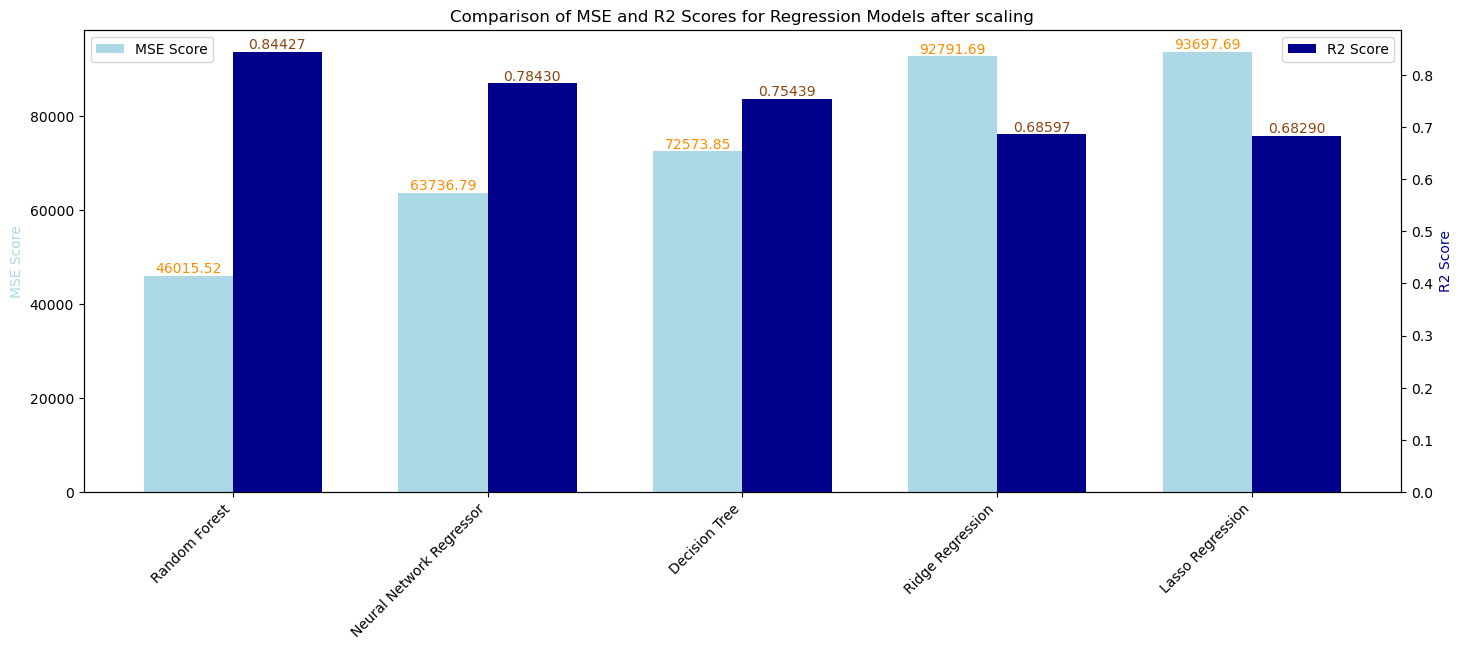

In [169]:
# Get names of the models
model_names_scaled = ["Ridge Regression", "Lasso Regression",
                      "Decision Tree", "Random Forest", "Neural Network Regressor"]

# List of MSE Score after scaling
mse_scores_scaled = [92791.69, 93697.69, 72573.85, 46015.52, 63736.79]

# List of R2 Score after scaling
r2_scores_scaled = [0.68597, 0.68290, 0.75439, 0.84427, 0.78430]

# Sort model names and scores based on R2 values in descending order
sorted_indices_scaled = np.argsort(r2_scores_scaled)[::-1]
sorted_model_names_scaled = [model_names_scaled[i] for i in sorted_indices_scaled]
sorted_mse_scores_scaled = [mse_scores_scaled[i] for i in sorted_indices_scaled]
sorted_r2_scores_scaled = [r2_scores_scaled[i] for i in sorted_indices_scaled]

# Create a bar plot with sorted values and the "darkorange" and "saddlebrown" color palettes
fig, ax1 = plt.subplots(figsize=(17, 6))

# Bar width
bar_width = 0.35

# Bar plot for MSE scores
bar1 = ax1.bar(np.arange(len(sorted_model_names_scaled)), sorted_mse_scores_scaled, bar_width, label='MSE Score', color='lightblue')

# Create a second y-axis for R2 scores
ax2 = ax1.twinx()
bar2 = ax2.bar(np.arange(len(sorted_model_names_scaled)) + bar_width, sorted_r2_scores_scaled, bar_width, label='R2 Score', color='darkblue')

# Set x-axis ticks and labels
ax1.set_xticks(np.arange(len(sorted_model_names_scaled)) + bar_width / 2)
ax1.set_xticklabels(sorted_model_names_scaled, rotation=45, ha='right')

# Set y-axis labels
ax1.set_ylabel('MSE Score', color='lightblue')
ax2.set_ylabel('R2 Score', color='darkblue')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add values on top of the bars
for i, (mse, r2) in enumerate(zip(sorted_mse_scores_scaled, sorted_r2_scores_scaled)):
    ax1.text(i, mse, f'{mse:.2f}', ha='center', va='bottom', color='darkorange')
    ax2.text(i + bar_width, r2, f'{r2:.5f}', ha='center', va='bottom', color='saddlebrown')

plt.title("Comparison of MSE and R2 Scores for Regression Models after scaling")
plt.show()

**Findings**

1. **Random Forest:**
   - **R2 Score:** 0.84427, **MSE Score:** 46015.52
   - Demonstrates superior predictive accuracy and generalization, outperforming other models.

2. **Neural Network Regressor:**
   - **R2 Score:** 0.78430, **MSE Score:** 63736.79
   - Second-best model, showing strong performance and capturing complex patterns.

3. **Decision Tree:**
   - **R2 Score:** 0.75439, **MSE Score:** 72573.85
   - Shows strong performance, capturing complex patterns in the data.

4. **Ridge and Lasso Regression:**
   - **R2 Score:** 0.68597, **MSE Score:** 92791.69  (ridge)
   - **R2 Score:** 0.68290, **MSE Score:** 93697.69  (lasso)
   - Both of these exhibits lower R2 Scores, indicating weaker predictive performance.

5. **Linear Regression:**
   - **R2 Score:** -4.68e+21, **MSE Score:** 1.38e+27
   - Significantly negative R2 Score, thus not visible on the graph and very high MSE Score indicate a poor fit.

---

## Side-by-side comparison Pre-scaled models vs Post-scaled models <a class="anchor" id="comparison"></a>
---

For better visualization and comparison, we can plot the R2 values (converted to percentage) in subplots.

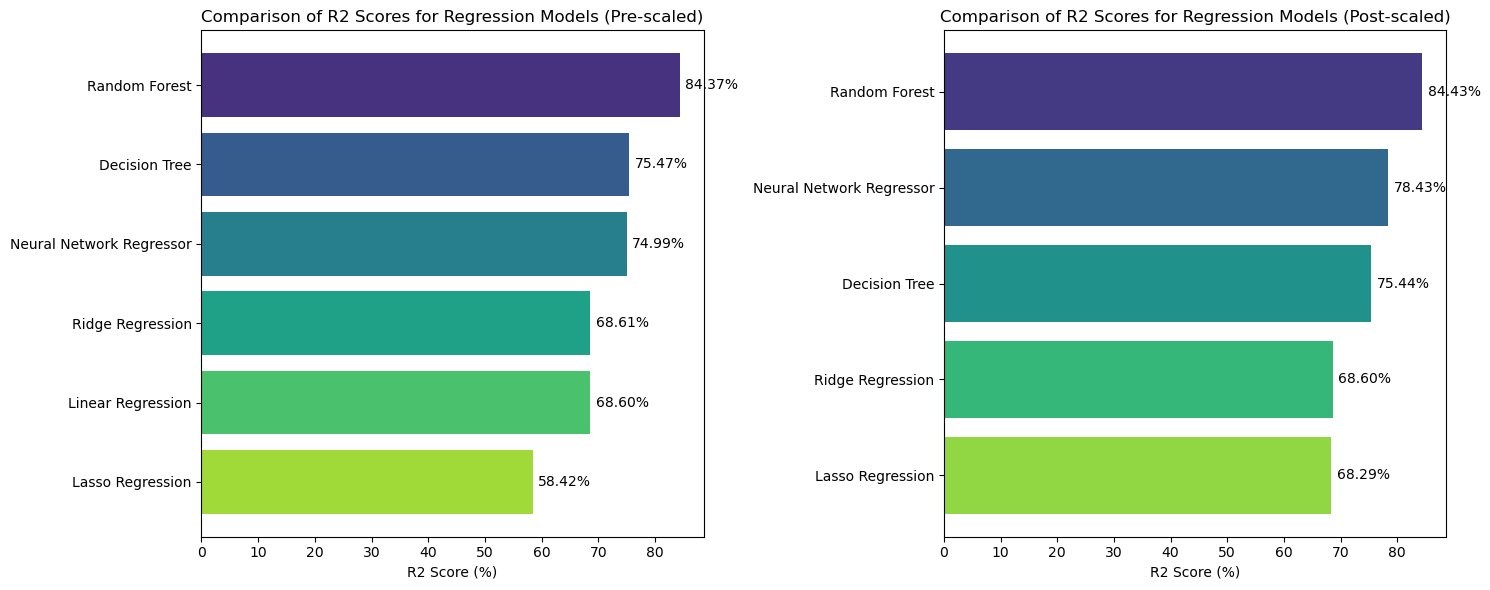

In [155]:
import matplotlib.ticker as mtick

# Create subplots with two columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Convert R2 scores to percentages
sorted_r2_scores_percent = [score * 100 for score in sorted_r2_scores]
sorted_r2_scores_scaled_percent = [score * 100 for score in sorted_r2_scores_scaled]

# Plot R2 scores for pre-scaled models
axs[0].barh(sorted_model_names, sorted_r2_scores_percent, color=colors)
axs[0].set_xlabel("R2 Score (%)")
axs[0].set_title("Comparison of R2 Scores for Regression Models (Pre-scaled)")
axs[0].invert_yaxis()

# Annotate bars with percentages
for i, score in enumerate(sorted_r2_scores_percent):
    axs[0].text(score + 1, i, f'{score:.2f}%', va='center')

# Plot R2 scores for post-scaled models
axs[1].barh(sorted_model_names_scaled, sorted_r2_scores_scaled_percent, color=colors_scaled)
axs[1].set_xlabel("R2 Score (%)")
axs[1].set_title("Comparison of R2 Scores for Regression Models (Post-scaled)")
axs[1].invert_yaxis()

# Annotate bars with percentages
for i, score in enumerate(sorted_r2_scores_scaled_percent):
    axs[1].text(score + 1, i, f'{score:.2f}%', va='center')

# Automatically adjust subplot parameters to avoid overlapping
plt.tight_layout()
plt.show()

### Findings and Conclusion:


1. **Random Forest** consistently demonstrates superior predictive accuracy and generalization having the highest **R2 Score** of more than **84.00%** both before and after scaling.

2. **Neural Network Regressor** shows improvement in performance after scaling, capturing complex patterns with an increased **R2 Score** of **78.43%**.

3. **Decision Tree** maintains strong performance in both scenarios, capturing complex patterns with a **R2 Score** of **75.44%** after scaling.

4. **Ridge Regression** remains relatively stable in performance before and after scaling, with a low **R2 Score** of **68.60%**.

5. **Lasso Regression** exhibits an increase in predictive performance after scaling, with a **R2 Score** of **68.29%**.

6. **Linear Regression** experiences a drastic decrease in predictive performance after scaling, suggesting a poor fit to the scaled data with a negative **R2 Score** of **-4.68e+21%**.


In summary, scaling has varying effects on different regression models. While some models remain robust, others show improvements or deteriorations in their predictive performance. It's essential to carefully evaluate the impact of scaling on model performance for accurate and reliable predictions.

---